In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter  # Import ScalarFormatter
import uproot
sys.path.append("../")
import saq


Welcome to JupyROOT 6.28/06


In [3]:
# Define the list of file paths
root_file_paths = [
   #'/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_15_04_31.root', #0.01nA
   '/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_14_49_45.root', #0.05nA
   '/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_14_22_50.root',#0.1nA
   '/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_15_41_34.root', #0.5nA
   '/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_15_43_48.root', #1nA
    '/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_13_14_41.root', #5nA
   '/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_15_48_49.root' , #10nA
   '/home/wwz/saq_analysis/calibration/05_19_2023_15_45_23.root'
]

# Initialize lists to store data for each file
timestamps_list = []
masks_list = []

# Define constants
clock_rate = 30.3e6
nn = 0
cutoff = (2**32) - 1
loop_time = cutoff / clock_rate

j = 1

real_channel = 6
reset_rate_afcut=[] # to store the rest rates for ch 2, 5, and 8 after lower cut

# Iterate through each root file
for k, root_file_path in enumerate(root_file_paths):
    # Open the ROOT file
    file = uproot.open(root_file_path)

    # Access the tree from the ROOT file
    tree = file["tt"]  # 'tt' is the name of the data tree in the root file

    # Convert the tree data into a dictionary
    data = tree.arrays(library="np")

    # Get timestamps from the data
    timestamps = data["Timestamp"]
    mask = data["ChMask"]

    #print(j, ", original rtds: ", len(timestamps))
    #print(len(mask))

    #print(timestamps[:10])
    #print(mask[:10])
    #filtered_timestamps = [timestamps[i] for i in range(5,len(timestamps)) if mask[i] == 2**(real_channel-1)]
    filtered_timestamps = [timestamps[i] for i in range(5,len(timestamps))]


    #print(j, ", filtered rtds: ", len(filtered_timestamps))
    #print(filtered_timestamps[:10])

    # Initialize an array to store time in seconds
    time_sec = np.zeros(len(filtered_timestamps))
    rtd_sec =[]
    filtered_rtd_sec=[]

    j = j+1

    # Convert the individual entries to show the time in seconds
    for i in range(len(filtered_timestamps)):
        time_sec[i] = filtered_timestamps[i] / clock_rate + (nn * loop_time)
        if i > 0 and filtered_timestamps[i] < filtered_timestamps[i - 1]:
            nn += 1
            time_sec[i] = float(filtered_timestamps[i] / clock_rate) + float(nn * loop_time)
    
    
    rtd_sec = np.diff(time_sec) #original rtds without any cut
    filtered_rtd_sec = [diff for diff in rtd_sec if diff > 5e-5] #rtds after lower cut at 5e-5 s

    print("rtd_sec length: ", len(rtd_sec), ", filtered_rtd_sec length: ", len(filtered_rtd_sec))

    #reset_rate_bfcut.append(len(time_sec)/(time_sec[-1]-time_sec[0]))
    reset_rate_afcut.append(len(filtered_rtd_sec)/(time_sec[-1]-time_sec[0]))
    
    #print(time_sec[0], ", ", time_sec[-1], ",", time_sec[-1]-time_sec[0], ",", len(time_sec), ", ", len(time_sec)/(time_sec[-1]-time_sec[0]))
    print(time_sec[0], ", ", time_sec[-1], ",", time_sec[-1]-time_sec[0], ",", len(filtered_rtd_sec), ", ", len(filtered_rtd_sec)/(time_sec[-1]-time_sec[0]))


    # Store the time_sec array in a list
    timestamps_list.append(time_sec)
    masks_list.append(data["ChMask"])

    nn=0

print(reset_rate_afcut)

rtd_sec length:  766 , filtered_rtd_sec length:  606
0.6164199669966997 ,  119.02670864686469 , 118.41028867986799 , 606 ,  5.11779851866058
rtd_sec length:  630 , filtered_rtd_sec length:  533
0.3199280528052805 ,  58.261527920792076 , 57.941599867986795 , 533 ,  9.19891755171377
rtd_sec length:  1485 , filtered_rtd_sec length:  1253
0.10903290429042904 ,  30.12624594059406 , 30.01721303630363 , 1253 ,  41.742716037114704
rtd_sec length:  2920 , filtered_rtd_sec length:  2430
0.054248481848184815 ,  29.574674422442243 , 29.52042594059406 , 2430 ,  82.3158854445411
rtd_sec length:  14927 , filtered_rtd_sec length:  12091
0.005681518151815182 ,  29.77121231023102 , 29.765530792079208 , 12091 ,  406.2081097917962
rtd_sec length:  29140 , filtered_rtd_sec length:  23066
0.003635841584158416 ,  30.701883630363035 , 30.698247788778875 , 23066 ,  751.3783900210523
rtd_sec length:  818 , filtered_rtd_sec length:  764
0.38494808580858086 ,  971.3748770297029 , 970.9899289438944 , 764 ,  0.7868

In [ ]:
# Define the list of file paths
root_file_paths = [
   #'/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_15_04_31.root', #0.01nA
   '/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_14_49_45.root', #0.05nA
   '/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_14_22_50.root',#0.1nA
   '/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_15_41_34.root', #0.5nA
   '/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_15_43_48.root', #1nA
    '/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_13_14_41.root', #5nA
   '/home/wwz/saq_analysis/calibration/11_09_2023_Ch6_diff_current/11_09_2023_15_48_49.root' , #10nA
   '/home/wwz/saq_analysis/calibration/05_19_2023_15_45_23.root'
]

# Initialize lists to store data for each file
timestamps_list = []
masks_list = []

# Define constants
clock_rate = 30.3e6
nn = 0
cutoff = (2**32) - 1
loop_time = cutoff / clock_rate

j = 1

real_channel = 6
reset_rate_afcut=[] # to store the rest rates for ch 2, 5, and 8 after lower cut

# Iterate through each root file
for k, root_file_path in enumerate(root_file_paths):
    # Open the ROOT file
    file = uproot.open(root_file_path)

    # Access the tree from the ROOT file
    tree = file["tt"]  # 'tt' is the name of the data tree in the root file

    # Convert the tree data into a dictionary
    data = tree.arrays(library="np")

    # Get timestamps from the data
    timestamps = data["Timestamp"]
    mask = data["ChMask"]

    #print(j, ", original rtds: ", len(timestamps))
    #print(len(mask))

    #print(timestamps[:10])
    #print(mask[:10])
    #filtered_timestamps = [timestamps[i] for i in range(5,len(timestamps)) if mask[i] == 2**(real_channel-1)]
    filtered_timestamps = [timestamps[i] for i in range(5,len(timestamps))]


    #print(j, ", filtered rtds: ", len(filtered_timestamps))
    #print(filtered_timestamps[:10])

    # Initialize an array to store time in seconds
    time_sec = np.zeros(len(filtered_timestamps))
    rtd_sec =[]
    filtered_rtd_sec=[]

    j = j+1

    # Convert the individual entries to show the time in seconds
    for i in range(len(filtered_timestamps)):
        time_sec[i] = filtered_timestamps[i] / clock_rate + (nn * loop_time)
        if i > 0 and filtered_timestamps[i] < filtered_timestamps[i - 1]:
            nn += 1
            time_sec[i] = float(filtered_timestamps[i] / clock_rate) + float(nn * loop_time)
    
    
    rtd_sec = np.diff(time_sec) #original rtds without any cut
    filtered_rtd_sec = [diff for diff in rtd_sec if diff > 5e-5] #rtds after lower cut at 5e-5 s

    print("rtd_sec length: ", len(rtd_sec), ", filtered_rtd_sec length: ", len(filtered_rtd_sec))

    #reset_rate_bfcut.append(len(time_sec)/(time_sec[-1]-time_sec[0]))
    reset_rate_afcut.append(len(filtered_rtd_sec)/(time_sec[-1]-time_sec[0]))
    
    #print(time_sec[0], ", ", time_sec[-1], ",", time_sec[-1]-time_sec[0], ",", len(time_sec), ", ", len(time_sec)/(time_sec[-1]-time_sec[0]))
    print(time_sec[0], ", ", time_sec[-1], ",", time_sec[-1]-time_sec[0], ",", len(filtered_rtd_sec), ", ", len(filtered_rtd_sec)/(time_sec[-1]-time_sec[0]))


    # Store the time_sec array in a list
    timestamps_list.append(time_sec)
    masks_list.append(data["ChMask"])

    nn=0

print(reset_rate_afcut)

rtd_sec length:  766 , filtered_rtd_sec length:  606
0.6164199669966997 ,  119.02670864686469 , 118.41028867986799 , 606 ,  5.11779851866058
rtd_sec length:  630 , filtered_rtd_sec length:  533
0.3199280528052805 ,  58.261527920792076 , 57.941599867986795 , 533 ,  9.19891755171377
rtd_sec length:  1485 , filtered_rtd_sec length:  1253
0.10903290429042904 ,  30.12624594059406 , 30.01721303630363 , 1253 ,  41.742716037114704
rtd_sec length:  2920 , filtered_rtd_sec length:  2430
0.054248481848184815 ,  29.574674422442243 , 29.52042594059406 , 2430 ,  82.3158854445411
rtd_sec length:  14927 , filtered_rtd_sec length:  12091
0.005681518151815182 ,  29.77121231023102 , 29.765530792079208 , 12091 ,  406.2081097917962
rtd_sec length:  29140 , filtered_rtd_sec length:  23066
0.003635841584158416 ,  30.701883630363035 , 30.698247788778875 , 23066 ,  751.3783900210523
rtd_sec length:  818 , filtered_rtd_sec length:  764
0.38494808580858086 ,  971.3748770297029 , 970.9899289438944 , 764 ,  0.7868

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_280/768540626.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1000)


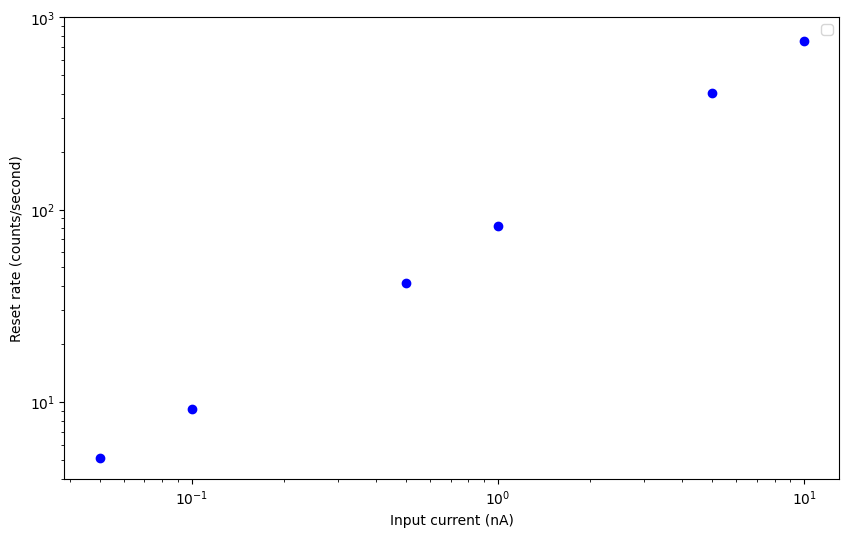

In [11]:
#################################################################################################################
# Plot the reset rate vs. current for Ch 2, 5, and 8 and perform a linear fit for each data set before any cut
#################################################################################################################

x_current =[0.05, 0.1, 0.5, 1, 5, 10]

#print(len(ch8_reset_rate))

plt.figure(figsize=(10, 6))
plt.scatter(x_current, reset_rate_afcut, color='blue')

plt.xlabel("Input current (nA)")
plt.ylabel("Reset rate (counts/second)")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylim(0, 1000)
plt.show()

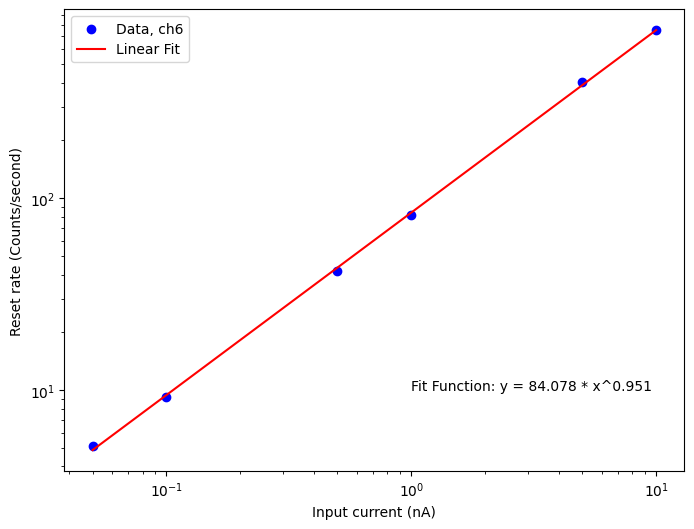

In [23]:
#Apply linear fit to the data
plt.figure(figsize=(8, 6)) 
# Perform linear fit using numpy.polyfit. It is a polynomial of a specified degree to a set of data points.
fit_params = np.polyfit(np.log(x_current), np.log(reset_rate_afcut), 1) # 1 is the degree of the polynominal fit. i.e. a linear fit
fit_line = np.poly1d(fit_params)

#print(fit_params[0], ", ", fit_params[1])

# Plot the scatter plot
plt.scatter(x_current, reset_rate_afcut, label=f'Data, ch6', color='blue')
    
# Plot the fitted line
plt.plot(x_current, np.exp(fit_line(np.log(x_current))), label='Linear Fit', color='red')
#plt.plot(x_current, fit_line(x_current), label='Linear Fit', color='red')

# Annotate the plot with the fit equation
# Display fit function equation as text on plot
plt.text(1, 10, f'Fit Function: y = {np.exp(fit_params[1]):.3f} * x^{fit_params[0]:.3f}', fontsize=10)
#equation_text = f'Fit: y = {fit_params[0]:.2f}x + {fit_params[1]:.2f}'
#plt.annotate(equation_text, (0.5, 0.3), xycoords='axes fraction', fontsize=10, color='black')

plt.xlabel('Input current (nA)')
plt.ylabel('Reset rate (Counts/second)')
# Set the x-axis ticks at every 0.5 interval
plt.xticks(np.arange(0, 10.5, 0.5))
# Set the x-axis limits to zoom in from 0 to 1
#plt.xlim(0, 2)
#plt.ylim(0, 300)
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.show()

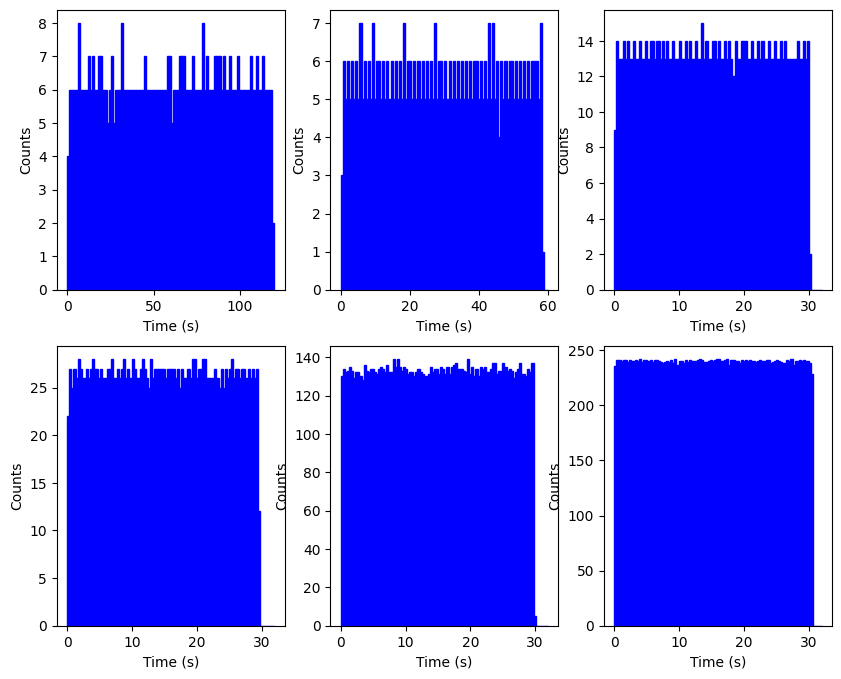

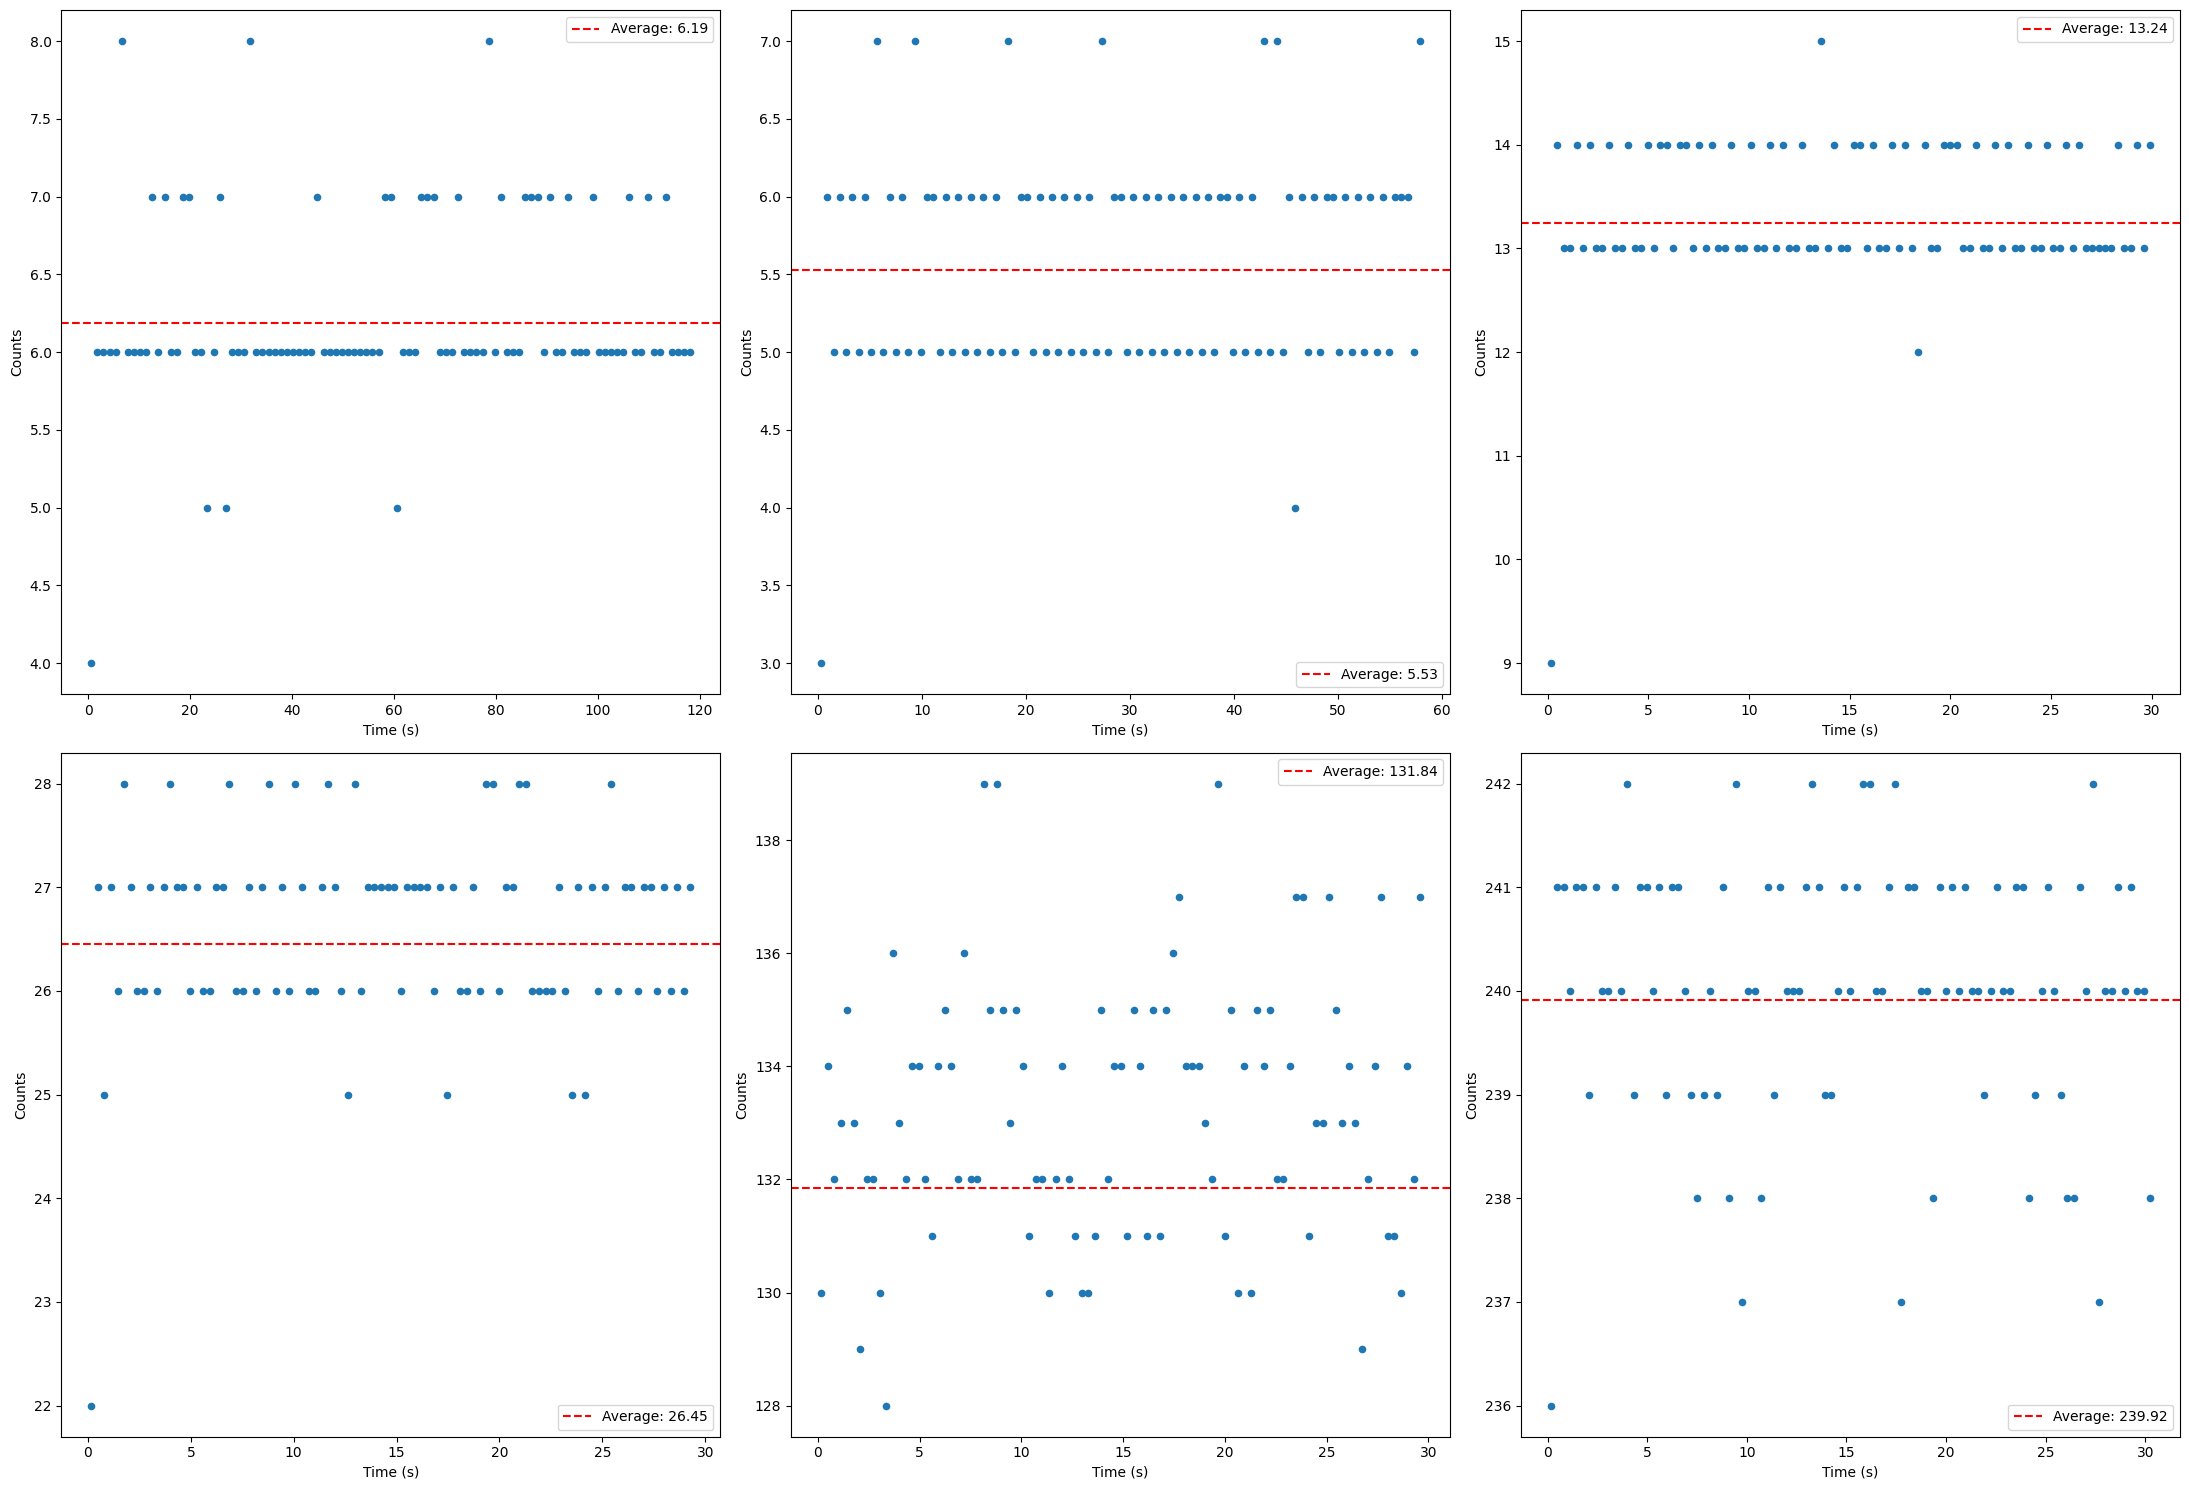

In [6]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Create lists to store bin content from each histogram
bin_contents = []
bin_center=[]

# Create lists to store averages for each channel
averages = []
# Define the desired range for each histogram
histogram_ranges = [(0, 120), (0, 60), (0, 32), (0, 32), (0, 32), (0, 32)]

# Loop through your data and create histograms
for i in range(6):
    row = i // 3 #Integer division (//) in Python returns the whole number part of the division result.
    col = i % 3 #The modulo operator (%) in Python returns the remainder of the division operation. 
    ax = axes[row, col]

    # Create the histogram and plot for the "timestamp" data
    hist, bins, _ = ax.hist(timestamps_list[i], range=histogram_ranges[i], bins=100, color='blue', alpha=1, edgecolor='blue')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Counts')

  # Store the bin content in the bin_contents list
    bin_contents.append(hist)
    bin_center.append(bins)

# Create a new 3x5 subplot grid to display the scatter plots of bin content
fig2, axes2 = plt.subplots(2, 3, figsize=(22, 15))

for i, content in enumerate(bin_contents):
    # Calculate the center of each bin
    bin_centers = (bin_center[i][:-1] + bin_center[i][1:]) / 2

    # Filter out bins with zero bin content
    non_zero_bins = content != 0
    avg = np.mean(content[non_zero_bins])
    averages.append(avg)

    # Scatter plot of non-zero bin content in the new subplot grid with specified range
    row = i // 3
    col = i % 3
    ax2 = axes2[row, col]
    ax2.scatter(bin_centers[non_zero_bins][:-1], content[non_zero_bins][:-1], marker='o', s=20)

    # Draw the average line on the scatter plot
    ax2.axhline(y=averages[i], color='red', linestyle='--', label=f'Average: {averages[i]:.2f}')

    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Counts')
    #ax2.set_title(f'Ch {i + 2}')
    ax2.legend()

plt.tight_layout()
plt.show()

0.05nA ,mean rtd:  196.04348845977316  ,std rtd:  19.27637872228034 ,mean charge:  9.802174422988658  ,std charge:  0.963818936114017
0.1nA  ,mean rtd:  108.708312497291  ,std rtd:  4.860069697909027 ,mean charge:  10.8708312497291  ,std charge:  0.48600696979090263
0.5nA  ,mean rtd:  23.975409377998503  ,std rtd:  1.0184415614384248 ,mean charge:  11.987704688999251  ,std charge:  0.5092207807192124
1nA  ,mean rtd:  12.1683507328474  ,std rtd:  0.7057738211302601 ,mean charge:  12.1683507328474  ,std charge:  0.7057738211302601
5nA  ,mean rtd:  2.4691405781805864  ,std rtd:  0.15987443297113396 ,mean charge:  12.345702890902933  ,std charge:  0.7993721648556699
10nA  ,mean rtd:  1.3330255824661887  ,std rtd:  0.09156427126701436 ,mean charge:  13.330255824661888  ,std charge:  0.9156427126701436


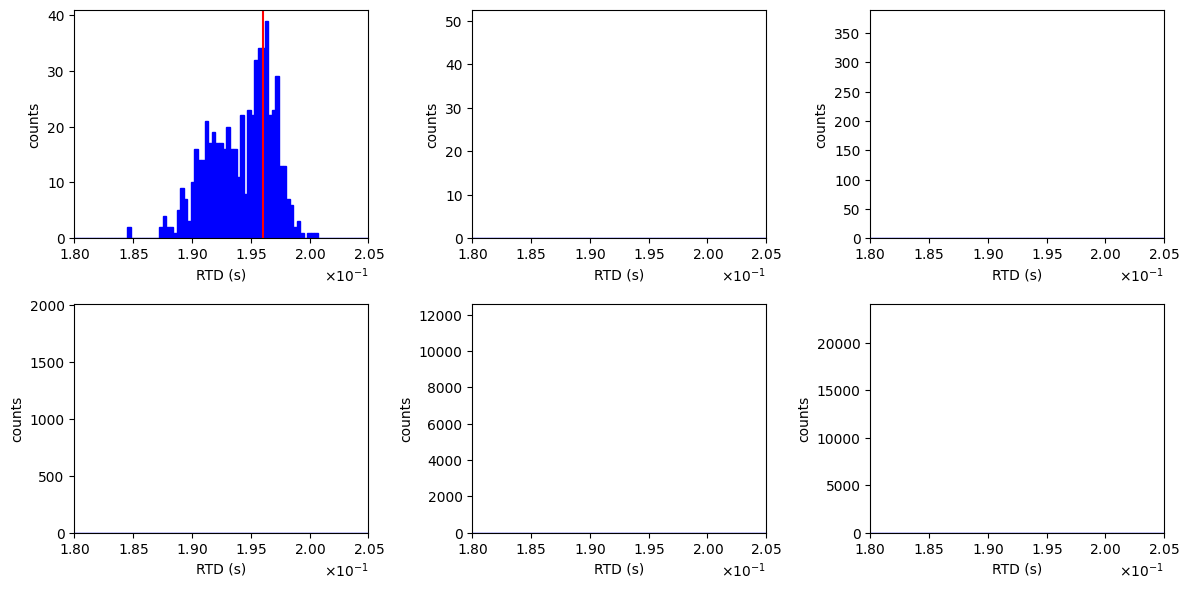

In [24]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

mean_charge = [] # To store the mean charge per reset for each channel
std_charge = [] # To store the standard deviation for the mean charge per reset for each channel

#print(len(timestamps_list))

# Iterate through each time data array and plot the time differences
for i in range(len(timestamps_list)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Calculate time differences between adjacent data points
    rtd = np.diff(timestamps_list[i])

    # Set lower and upper cutoffs for the data
    lower_cutoff = 5e-5  
    upper_cutoff = 500e-3  

# Apply conditional filtering to keep only the data within the desired range
    filtered_rtd = rtd[(rtd >= lower_cutoff) & (rtd <= upper_cutoff)]
    #print(len(filtered_rtd))

    mean_rtd = np.mean(filtered_rtd)
    std_rtd = np.std(filtered_rtd)

#Calcuate the mean charge per reset for each channel
    if(i==0):
      mean_Q = mean_rtd * 50 # 0.05 nA, i.e. 50 pA, the charge is in pC since rtd is in s and current is in pA
      std_Q = std_rtd * 50

    if(i==1):
      mean_Q = mean_rtd * 100 # 0.1 nA
      std_Q = std_rtd * 100

    if(i==2):
      mean_Q = mean_rtd * 500 # 0.5 nA
      std_Q = std_rtd * 500
    
    if(i==3):
      mean_Q = mean_rtd * 1000 # 1 nA
      std_Q = std_rtd * 1000

    if(i==4):
      mean_Q = mean_rtd * 5000 # 5 nA
      std_Q = std_rtd * 5000
  
    if(i==5):
      mean_Q = mean_rtd * 1e4 # 10 nA
      std_Q = std_rtd * 1e4


    mean_charge.append(mean_Q)
    std_charge.append(std_Q)

    if(i==0):
        print("0.05nA", ",mean rtd: ",  mean_rtd*1000, " ,std rtd: ", std_rtd*1000, ",mean charge: ", mean_Q, " ,std charge: ", std_Q)
    if(i==1):
        print("0.1nA", " ,mean rtd: ",   mean_rtd*1000, " ,std rtd: ", std_rtd*1000, ",mean charge: ", mean_Q, " ,std charge: ", std_Q)
    if(i==2):
        print("0.5nA", " ,mean rtd: ",   mean_rtd*1000, " ,std rtd: ", std_rtd*1000, ",mean charge: ", mean_Q, " ,std charge: ", std_Q)
    if(i==3):
        print("1nA", " ,mean rtd: ",   mean_rtd*1000, " ,std rtd: ", std_rtd*1000, ",mean charge: ", mean_Q, " ,std charge: ", std_Q)
    if(i==4):
        print("5nA", " ,mean rtd: ",   mean_rtd*1000, " ,std rtd: ", std_rtd*1000, ",mean charge: ", mean_Q, " ,std charge: ", std_Q)
    if(i==5):
        print("10nA", " ,mean rtd: ",   mean_rtd*1000, " ,std rtd: ", std_rtd*1000, ",mean charge: ", mean_Q, " ,std charge: ", std_Q)

 
      # Create a histogram of time differences
    ax.hist(filtered_rtd, bins=2000, range=(0, 0.6), color='blue', alpha=1, edgecolor='blue')
    ax.axvline(mean_rtd, color = 'red')
    ax.axvline(mean_rtd-std_rtd , color = 'green')
    ax.axvline(mean_rtd+std_rtd, color = 'green')

    # Configure the x-axis formatter to use scientific notation
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))  # Apply scientific notation

     # Add titles (labels) to x and y axes
    ax.set_xlabel('RTD (s)')  # Replace with your desired x-axis label
    ax.set_ylabel('counts')  # Replace with your desired y-axis label

    # Define your desired x-axis range
    x_min = 180e-3  # Replace with your desired minimum x-axis value
    x_max = 205e-3 # Replace with your desired maximum x-axis value

     # Set the x-axis range
    ax.set_xlim(x_min, x_max)
    #ax.set_yscale('log')
    #.set_title(f'Ch {i + 2}')

plt.tight_layout()
plt.show()

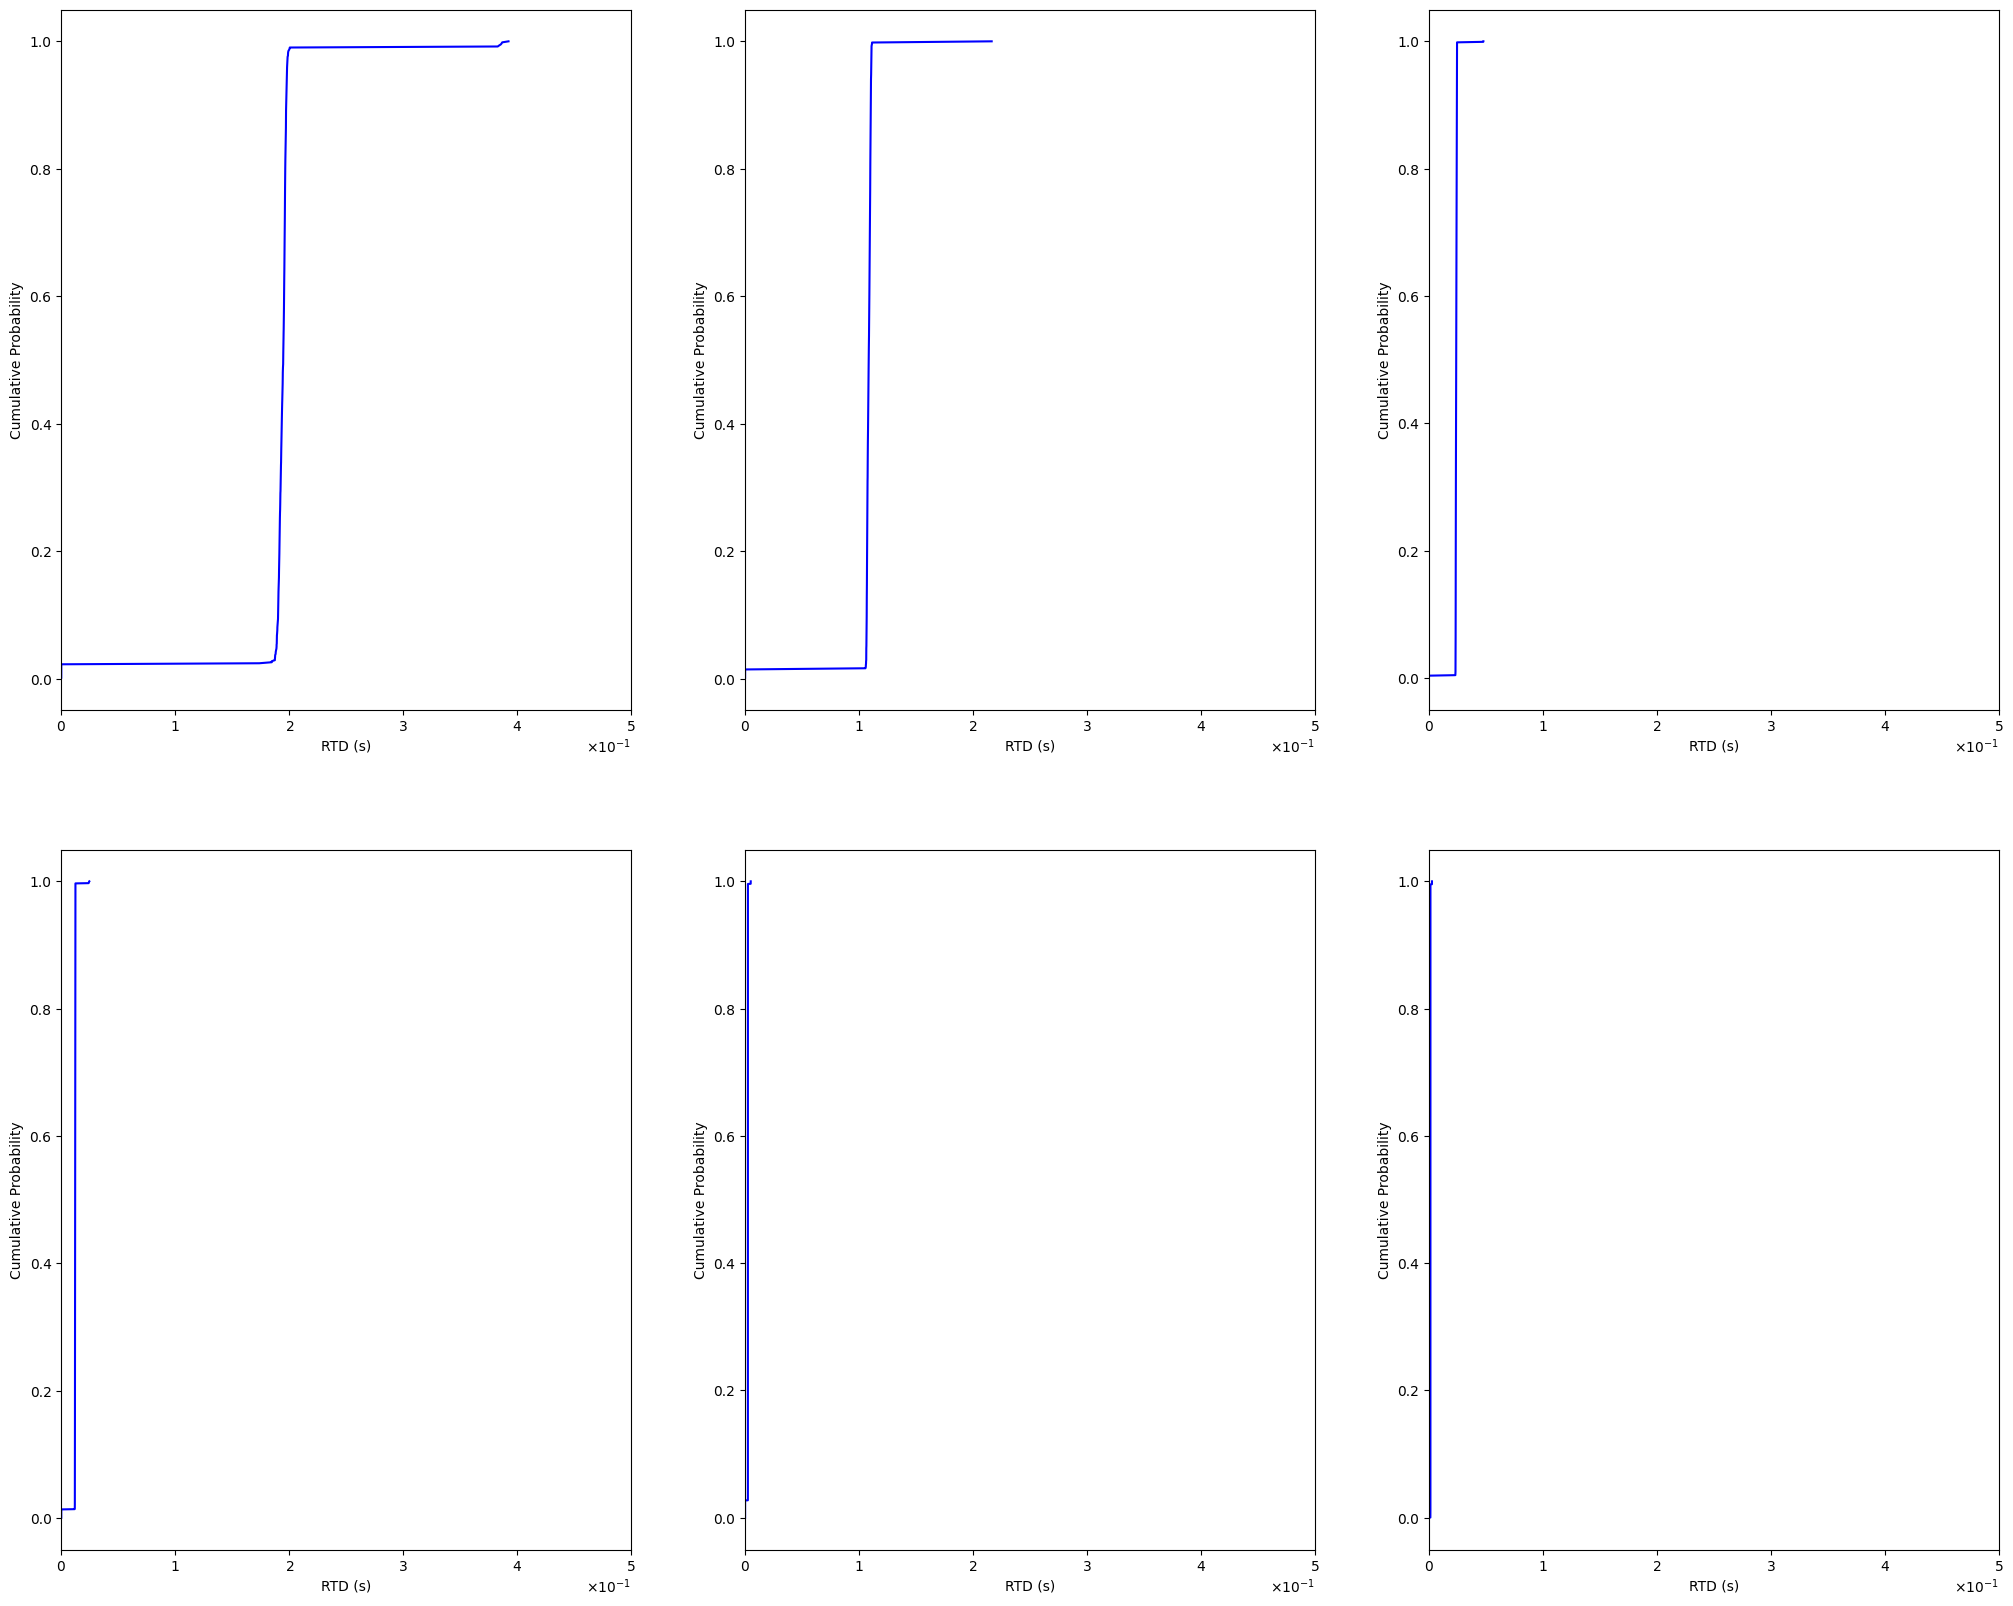

In [8]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(25, 20))

# Iterate through each time data array and plot the time differences
for i in range(len(timestamps_list)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Calculate time differences between adjacent data points
    rtd = np.diff(timestamps_list[i])

    # Set lower and upper cutoffs for the data
    lower_cutoff = 0  # Example lower cutoff
    upper_cutoff = 500e-3  # Example upper cutoff

# Apply conditional filtering to keep only the data within the desired range
    filtered_rtd = rtd[(rtd >= lower_cutoff) & (rtd <= upper_cutoff)]

 # Calculate the cumulative distribution
    sorted_rtd = np.sort(filtered_rtd)
    cumulative_prob = np.arange(1, len(sorted_rtd) + 1) / len(sorted_rtd)

    ax.plot(sorted_rtd, cumulative_prob, color='blue')

    
    # Add labels and a title
    ax.set_xlabel('RTD (s)')
    ax.set_ylabel('Cumulative Probability')
    #ax.set_title(f'Ch {i+2}')

    # Configure the x-axis formatter to use scientific notation
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

    # Define your desired x-axis range
    x_min = 0  # Replace with your desired minimum x-axis value
    x_max = 500e-3 # Replace with your desired maximum x-axis value

    # Set the x-axis range
    ax.set_xlim(x_min, x_max)

[9.802174422988658, 10.8708312497291, 11.987704688999251, 12.1683507328474, 12.345702890902933, 13.330255824661888]
[1.16504762 1.05051764 0.95264275 0.93850023 0.92501821 0.85669774]


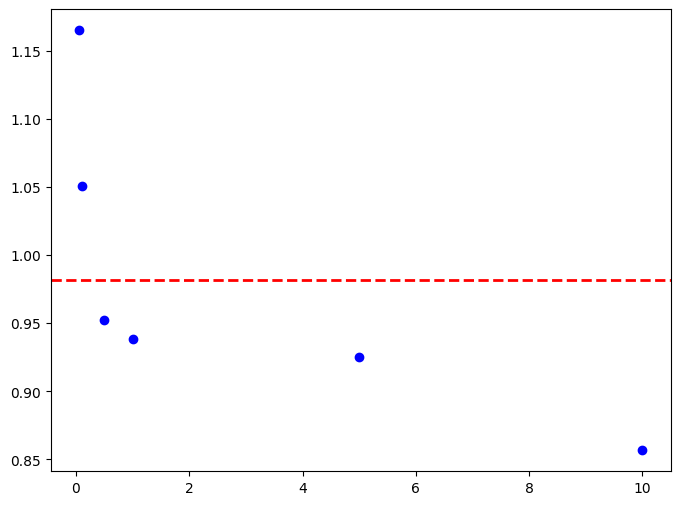

In [9]:
print(mean_charge)

charge_CVdd =11.42 
# Convert the list to a NumPy array for element-wise division
mean_charge_array = np.array(mean_charge)

# Perform the division and store the results in a new array
ch6_ratio = charge_CVdd / mean_charge_array
ch6_ratio_mean = np.mean(ch6_ratio)

plt.figure(figsize=(8, 6))

plt.scatter(x_current, ch6_ratio, label='ch 6', color='blue')

plt.axhline(ch6_ratio_mean, color='red', linestyle='--', label='Average = 0.616', linewidth=2)



print(ch6_ratio)

In [10]:
print(mean_charge)

charge_CVdd =11.42 

ch6_ratio =charge_CVdd/mean_charge

print(ch6_ratio)
   

#print(ch5_ratio)

ch5_ratio_mean = np.mean(ch5_ratio)
ch8_ratio_mean = np.mean(ch8_ratio)

print(ch5_ratio_mean, ", ", ch8_ratio_mean)

fig, axs = plt.subplots(1, 2, figsize=(20, 5)) 

# Plot each group in a separate subplot
#axs[0].scatter(x_current, ch2_ratio, label='ch 2', color='blue')
axs[0].scatter(x_current, ch5_ratio, label='ch 5', color='blue')
axs[1].scatter(x_current, ch8_ratio, label='ch 8', color='blue')

axs[0].axhline(ch5_ratio_mean, color='red', linestyle='--', label='Average = 0.616', linewidth=2)
axs[1].axhline(ch8_ratio_mean, color='red', linestyle='--', label='Average = 0.644', linewidth=2)


# Set common labels and title
for ax in axs:
    ax.set_xlabel('Current (nA)')
    ax.set_ylabel('$I_{r}/I$')
    ax.set_ylim(0, 1)
    ax.grid(True)
    ax.legend()

plt.show()


[9.802174422988658, 10.8708312497291, 11.987704688999251, 12.1683507328474, 12.345702890902933, 13.330255824661888]


TypeError: unsupported operand type(s) for /: 'float' and 'list'

[9.802174422988658, 10.8708312497291, 11.987704688999251, 12.1683507328474, 12.345702890902933, 13.330255824661888]
[0.05, 0.1, 0.5, 1, 5, 10]
11.750836635021537


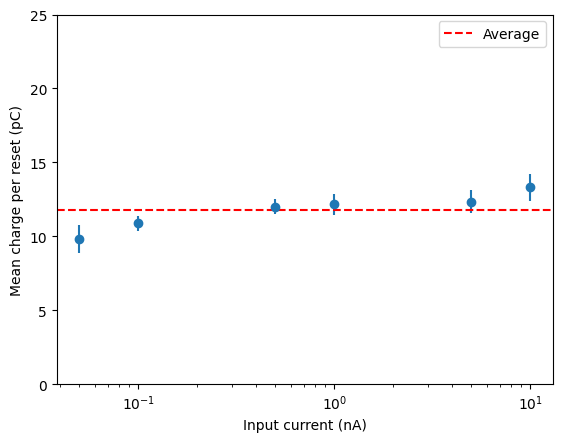

In [47]:
print(mean_charge)
print(x_current)
plt.errorbar(x_current, mean_charge, std_charge, fmt ='o')

avg_charge = np.mean(mean_charge)
print(avg_charge)

plt.axhline(avg_charge, linestyle = '--', color='r', label='Average')
plt.xlabel('Input current (nA)')
plt.ylabel('Mean charge per reset (pC)')
plt.xticks(range(0, 12, 1))
plt.xscale('log')
plt.ylim(0, 25)
plt.legend()
#plt.grid(True)